In [14]:
import os
import pandas as pd

csv_directory = os.path.join(os.getcwd(), "CSV_Data/train")

data_frames = []

for file_name in os.listdir(csv_directory):
    if file_name.endswith(".csv"):
        file_path = os.path.join(csv_directory, file_name)
        df = pd.read_csv(file_path)
        data_frames.append(df)


df = pd.concat(data_frames, ignore_index=True)
df['time'] = pd.to_datetime(df['time'])
df['month'] = df['time'].dt.month
for month in range(1, 13):
    df[f'month_{month}'] = (df['month'] == month).astype(int)
df = df.drop(columns=['time', 'month','cape','lspf','ssr','stl1','stl2','stl3','stl4','str','sshf','swvl1','swvl2','swvl3','swvl4','sd'])
df

csv_directory = os.path.join(os.getcwd(), "CSV_Data/predict")
data_frames_test = []

for file_name in os.listdir(csv_directory):
    if file_name.endswith(".csv"):
        file_path = os.path.join(csv_directory, file_name)
        df_test = pd.read_csv(file_path)
        data_frames_test.append(df_test)


df_test = pd.concat(data_frames_test, ignore_index=True)
df_test['time'] = pd.to_datetime(df_test['time'])
df_test['month'] = df_test['time'].dt.month
for month in range(1, 13):
    df_test[f'month_{month}'] = (df_test['month'] == month).astype(int)
df_test = df_test.drop(columns=['time', 'month','cape','lspf','ssr','stl1','stl2','stl3','stl4','str','sshf','swvl1','swvl2','swvl3','swvl4','sd'])
df

,latitude,longitude,u10,v10,si10,t2m,cp,hcc,lcc,msl,...,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12
0,-8.0,110.5,2.344467,0.063054,2.789527,299.384644,0.007486,0.690434,0.384355,101089.898438,...,0,0,0,0,0,0,0,0,0,0
1,-8.0,110.5,1.173486,-0.143608,2.024904,299.379181,0.008613,0.884154,0.297237,100957.632812,...,0,0,0,0,0,0,0,0,0,0
2,-8.0,110.5,-0.341681,0.204087,1.768726,299.884399,0.005313,0.658992,0.229010,101034.195312,...,1,0,0,0,0,0,0,0,0,0
3,-8.0,110.5,-1.057887,0.890051,2.316496,300.579437,0.002006,0.506277,0.206727,100998.882812,...,0,1,0,0,0,0,0,0,0,0
4,-8.0,110.5,-1.895216,1.226924,2.626484,300.134247,0.001197,0.452671,0.192340,101043.585938,...,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1289875,43.5,143.5,0.350612,1.387309,2.330283,291.484497,0.002408,0.616970,0.511854,100826.570312,...,0,0,0,0,0,1,0,0,0,0
1289876,43.5,143.5,0.563613,0.916273,2.248496,288.491547,0.001162,0.549608,0.419573,101548.664062,...,0,0,0,0,0,0,1,0,0,0
1289877,43.5,143.5,0.833414,0.512169,2.370110,280.706482,0.000918,0.258758,0.490618,101936.328125,...,0,0,0,0,0,0,0,1,0,0
1289878,43.5,143.5,1.390671,0.757308,2.496465,274.974762,0.000757,0.321744,0.438002,101662.359375,...,0,0,0,0,0,0,0,0,1,0


array([[<Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'u10'}>, <Axes: title={'center': 'v10'}>,
        <Axes: title={'center': 'si10'}>],
       [<Axes: title={'center': 't2m'}>, <Axes: title={'center': 'cp'}>,
        <Axes: title={'center': 'hcc'}>, <Axes: title={'center': 'lcc'}>,
        <Axes: title={'center': 'msl'}>],
       [<Axes: title={'center': 'rsn'}>, <Axes: title={'center': 'sf'}>,
        <Axes: title={'center': 'tcc'}>,
        <Axes: title={'center': 'tco3'}>,
        <Axes: title={'center': 'tcwv'}>],
       [<Axes: title={'center': 'tp'}>,
        <Axes: title={'center': 'PAM25'}>,
        <Axes: title={'center': 'month_1'}>,
        <Axes: title={'center': 'month_2'}>,
        <Axes: title={'center': 'month_3'}>],
       [<Axes: title={'center': 'month_4'}>,
        <Axes: title={'center': 'month_5'}>,
        <Axes: title={'center': 'month_6'}>,
        <Axes: title={'center': 'month_7'}>,
   

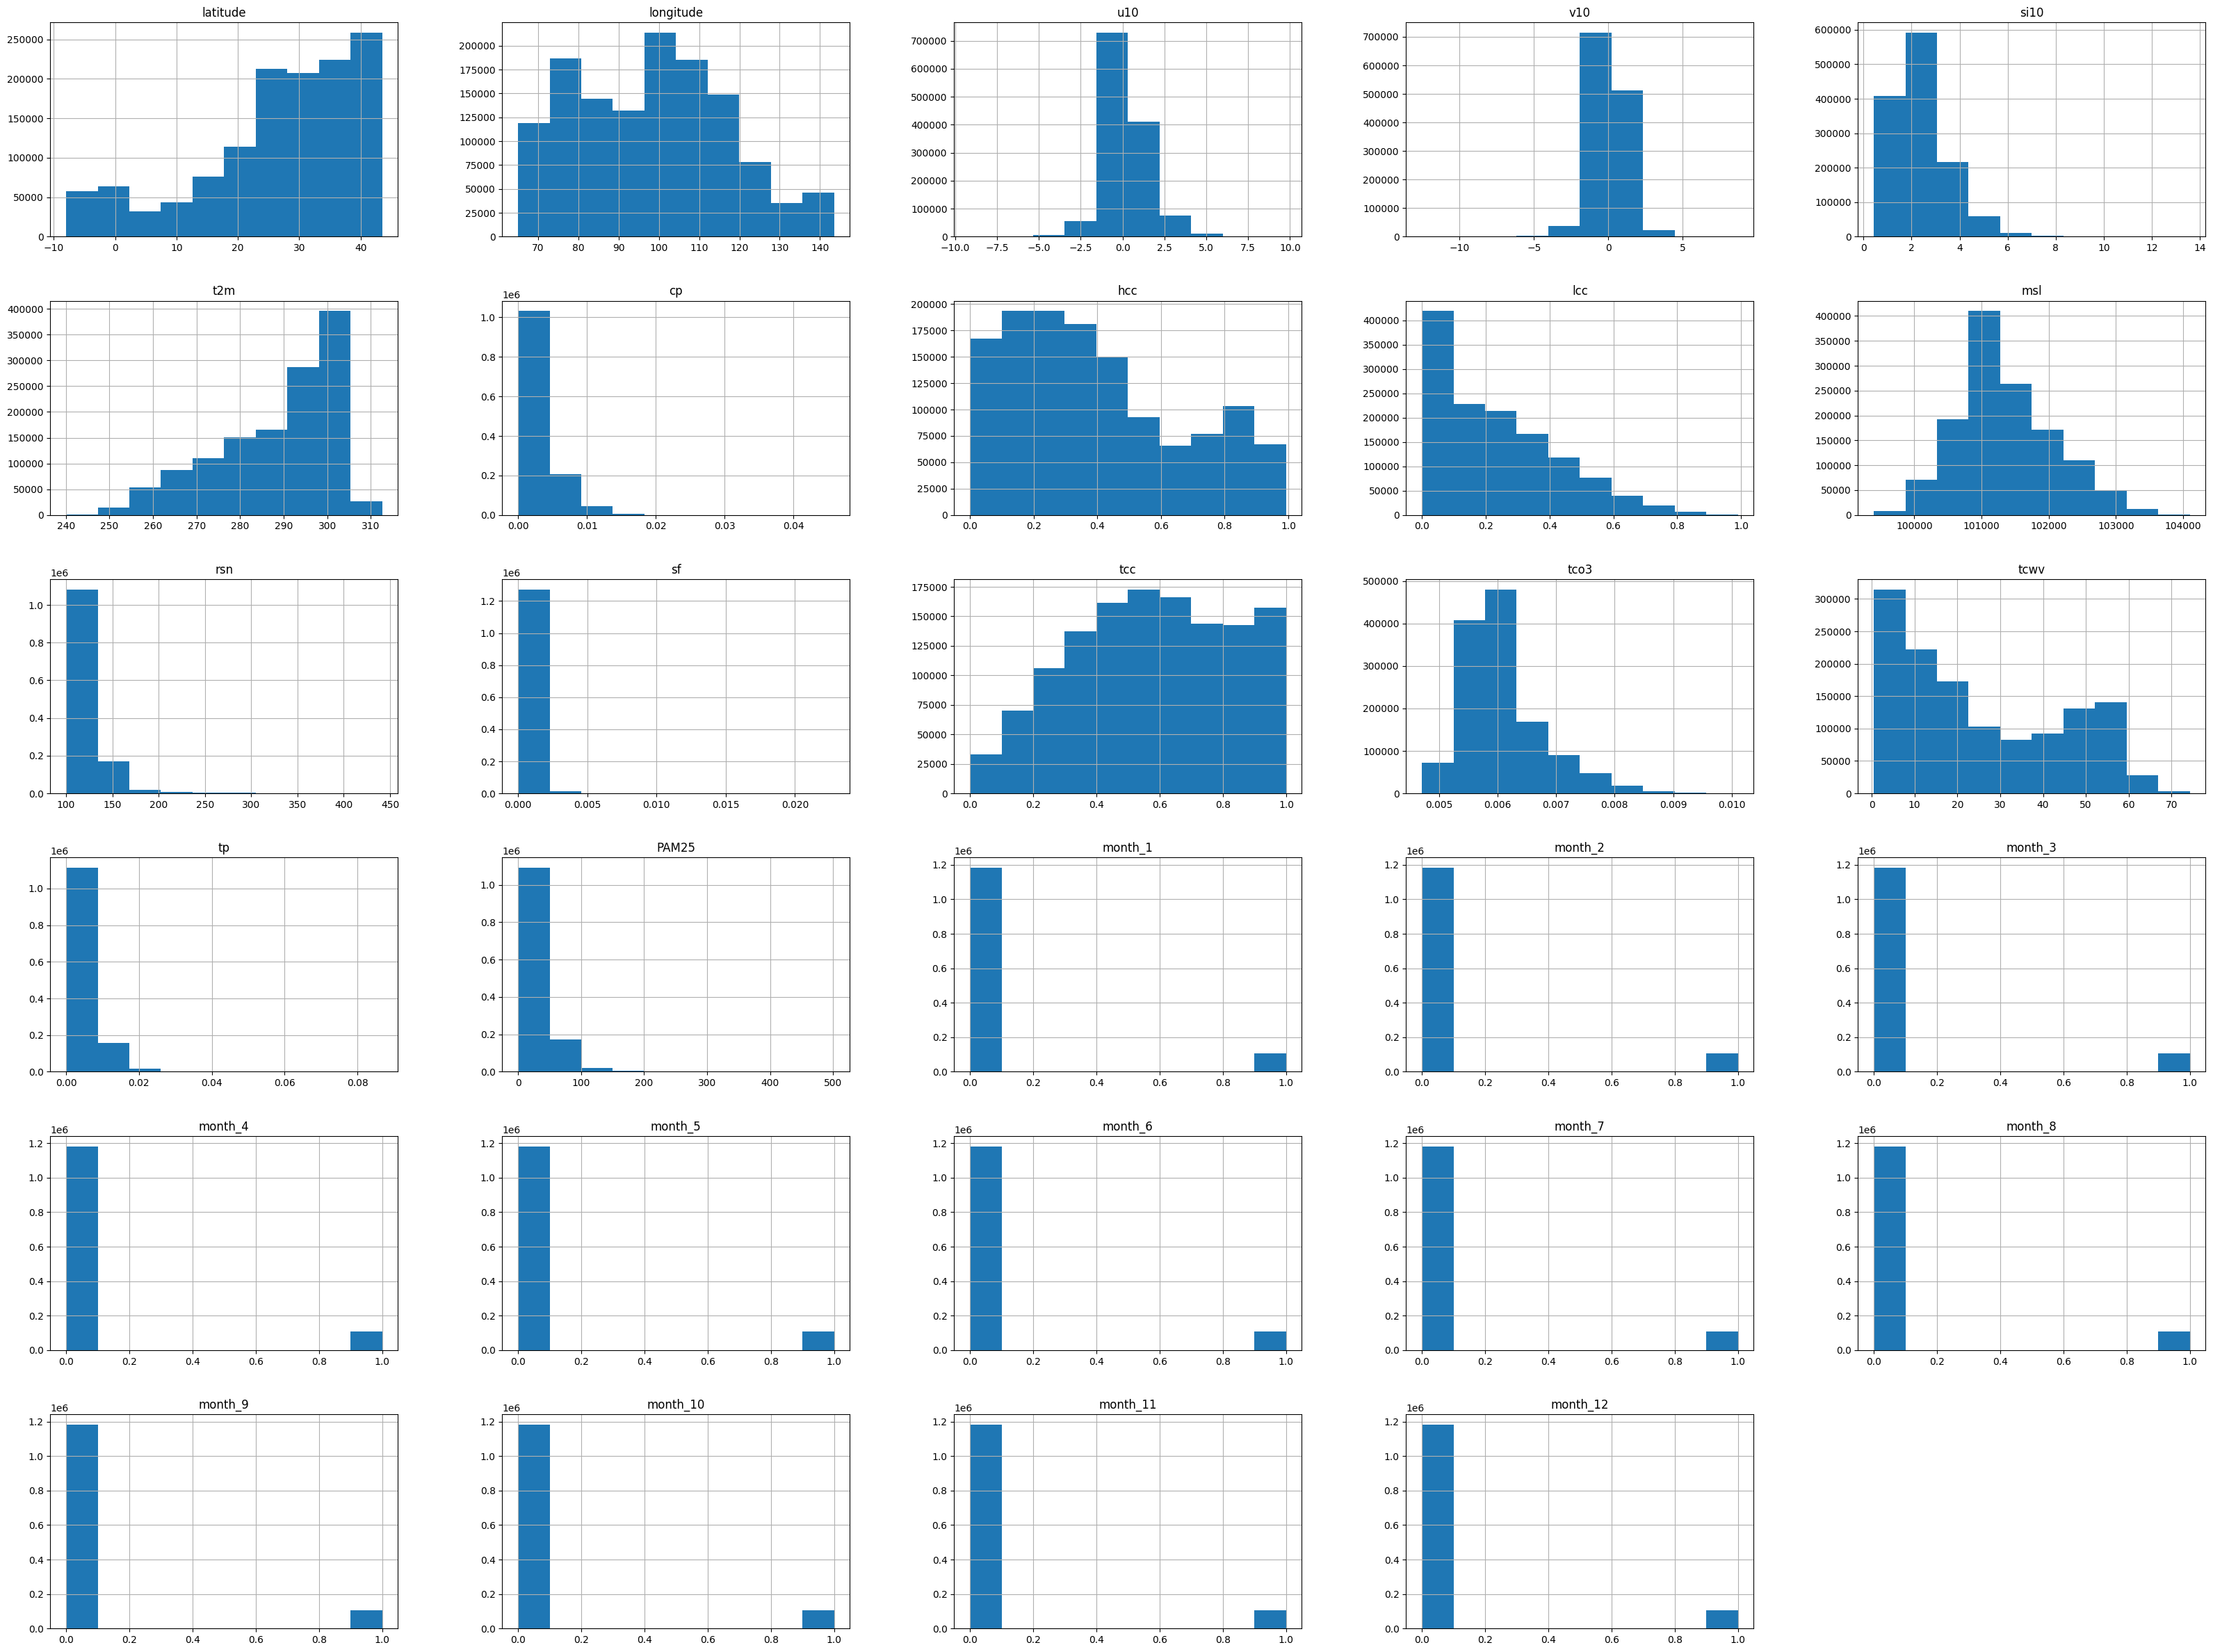

In [15]:
df.hist(figsize=(40,30))

In [16]:
for column in df.columns:
  if df[column].isnull().mean() > 0:
    df[column].fillna(df[column].mean(),inplace=True)


In [17]:
for column in df.columns:
  if df[column].dtype != 'O' and column[:5] != 'month':
    iqr = df[column].quantile(0.75) - df[column].quantile(0.25)
    upper_bound = df[column].quantile(0.75) + 1.5 * iqr
    lower_bound = df[column].quantile(0.25) - 1.5 * iqr
    df.loc[df[column]>=upper_bound,column] = upper_bound
    df.loc[df[column]<=lower_bound,column] = lower_bound

In [18]:
import numpy as np
from scipy import stats
#toboxcox = ['t2m','cp','lcc','stl1','stl2','stl3','stl4','tco3','tp','swvl2','swvl3','swvl4','PAM25']
toboxcox = ['t2m','cp','lcc','tco3','tp','PAM25']

#tosquareroot = ['sshf','tcwv']
tosquareroot = ['tcwv']
#toreciprocal = ['rsn','sd','sf','swvl1']
toreciprocal = ['rsn','sf']
tolog = ['si10','hcc']

for column in toboxcox:
  df[column] = stats.boxcox(df[column] + 1)[0]
  df_test[column] = stats.boxcox(df_test[column] + 1)[0]
for column in tolog:
  df[column] = np.log(df[column]+1)
  df_test[column] = np.log(df_test[column] + 1)
for column in tosquareroot:
  df[column] = np.sqrt(df[column]+1)
  df_test[column] = np.sqrt(df_test[column]+1)
for column in toreciprocal:
  df[column] = np.reciprocal(df[column]+1)
  df_test[column] = np.reciprocal(df_test[column]+1)


array([[<Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'u10'}>, <Axes: title={'center': 'v10'}>,
        <Axes: title={'center': 'si10'}>],
       [<Axes: title={'center': 't2m'}>, <Axes: title={'center': 'cp'}>,
        <Axes: title={'center': 'hcc'}>, <Axes: title={'center': 'lcc'}>,
        <Axes: title={'center': 'msl'}>],
       [<Axes: title={'center': 'rsn'}>, <Axes: title={'center': 'sf'}>,
        <Axes: title={'center': 'tcc'}>,
        <Axes: title={'center': 'tco3'}>,
        <Axes: title={'center': 'tcwv'}>],
       [<Axes: title={'center': 'tp'}>,
        <Axes: title={'center': 'PAM25'}>,
        <Axes: title={'center': 'month_1'}>,
        <Axes: title={'center': 'month_2'}>,
        <Axes: title={'center': 'month_3'}>],
       [<Axes: title={'center': 'month_4'}>,
        <Axes: title={'center': 'month_5'}>,
        <Axes: title={'center': 'month_6'}>,
        <Axes: title={'center': 'month_7'}>,
   

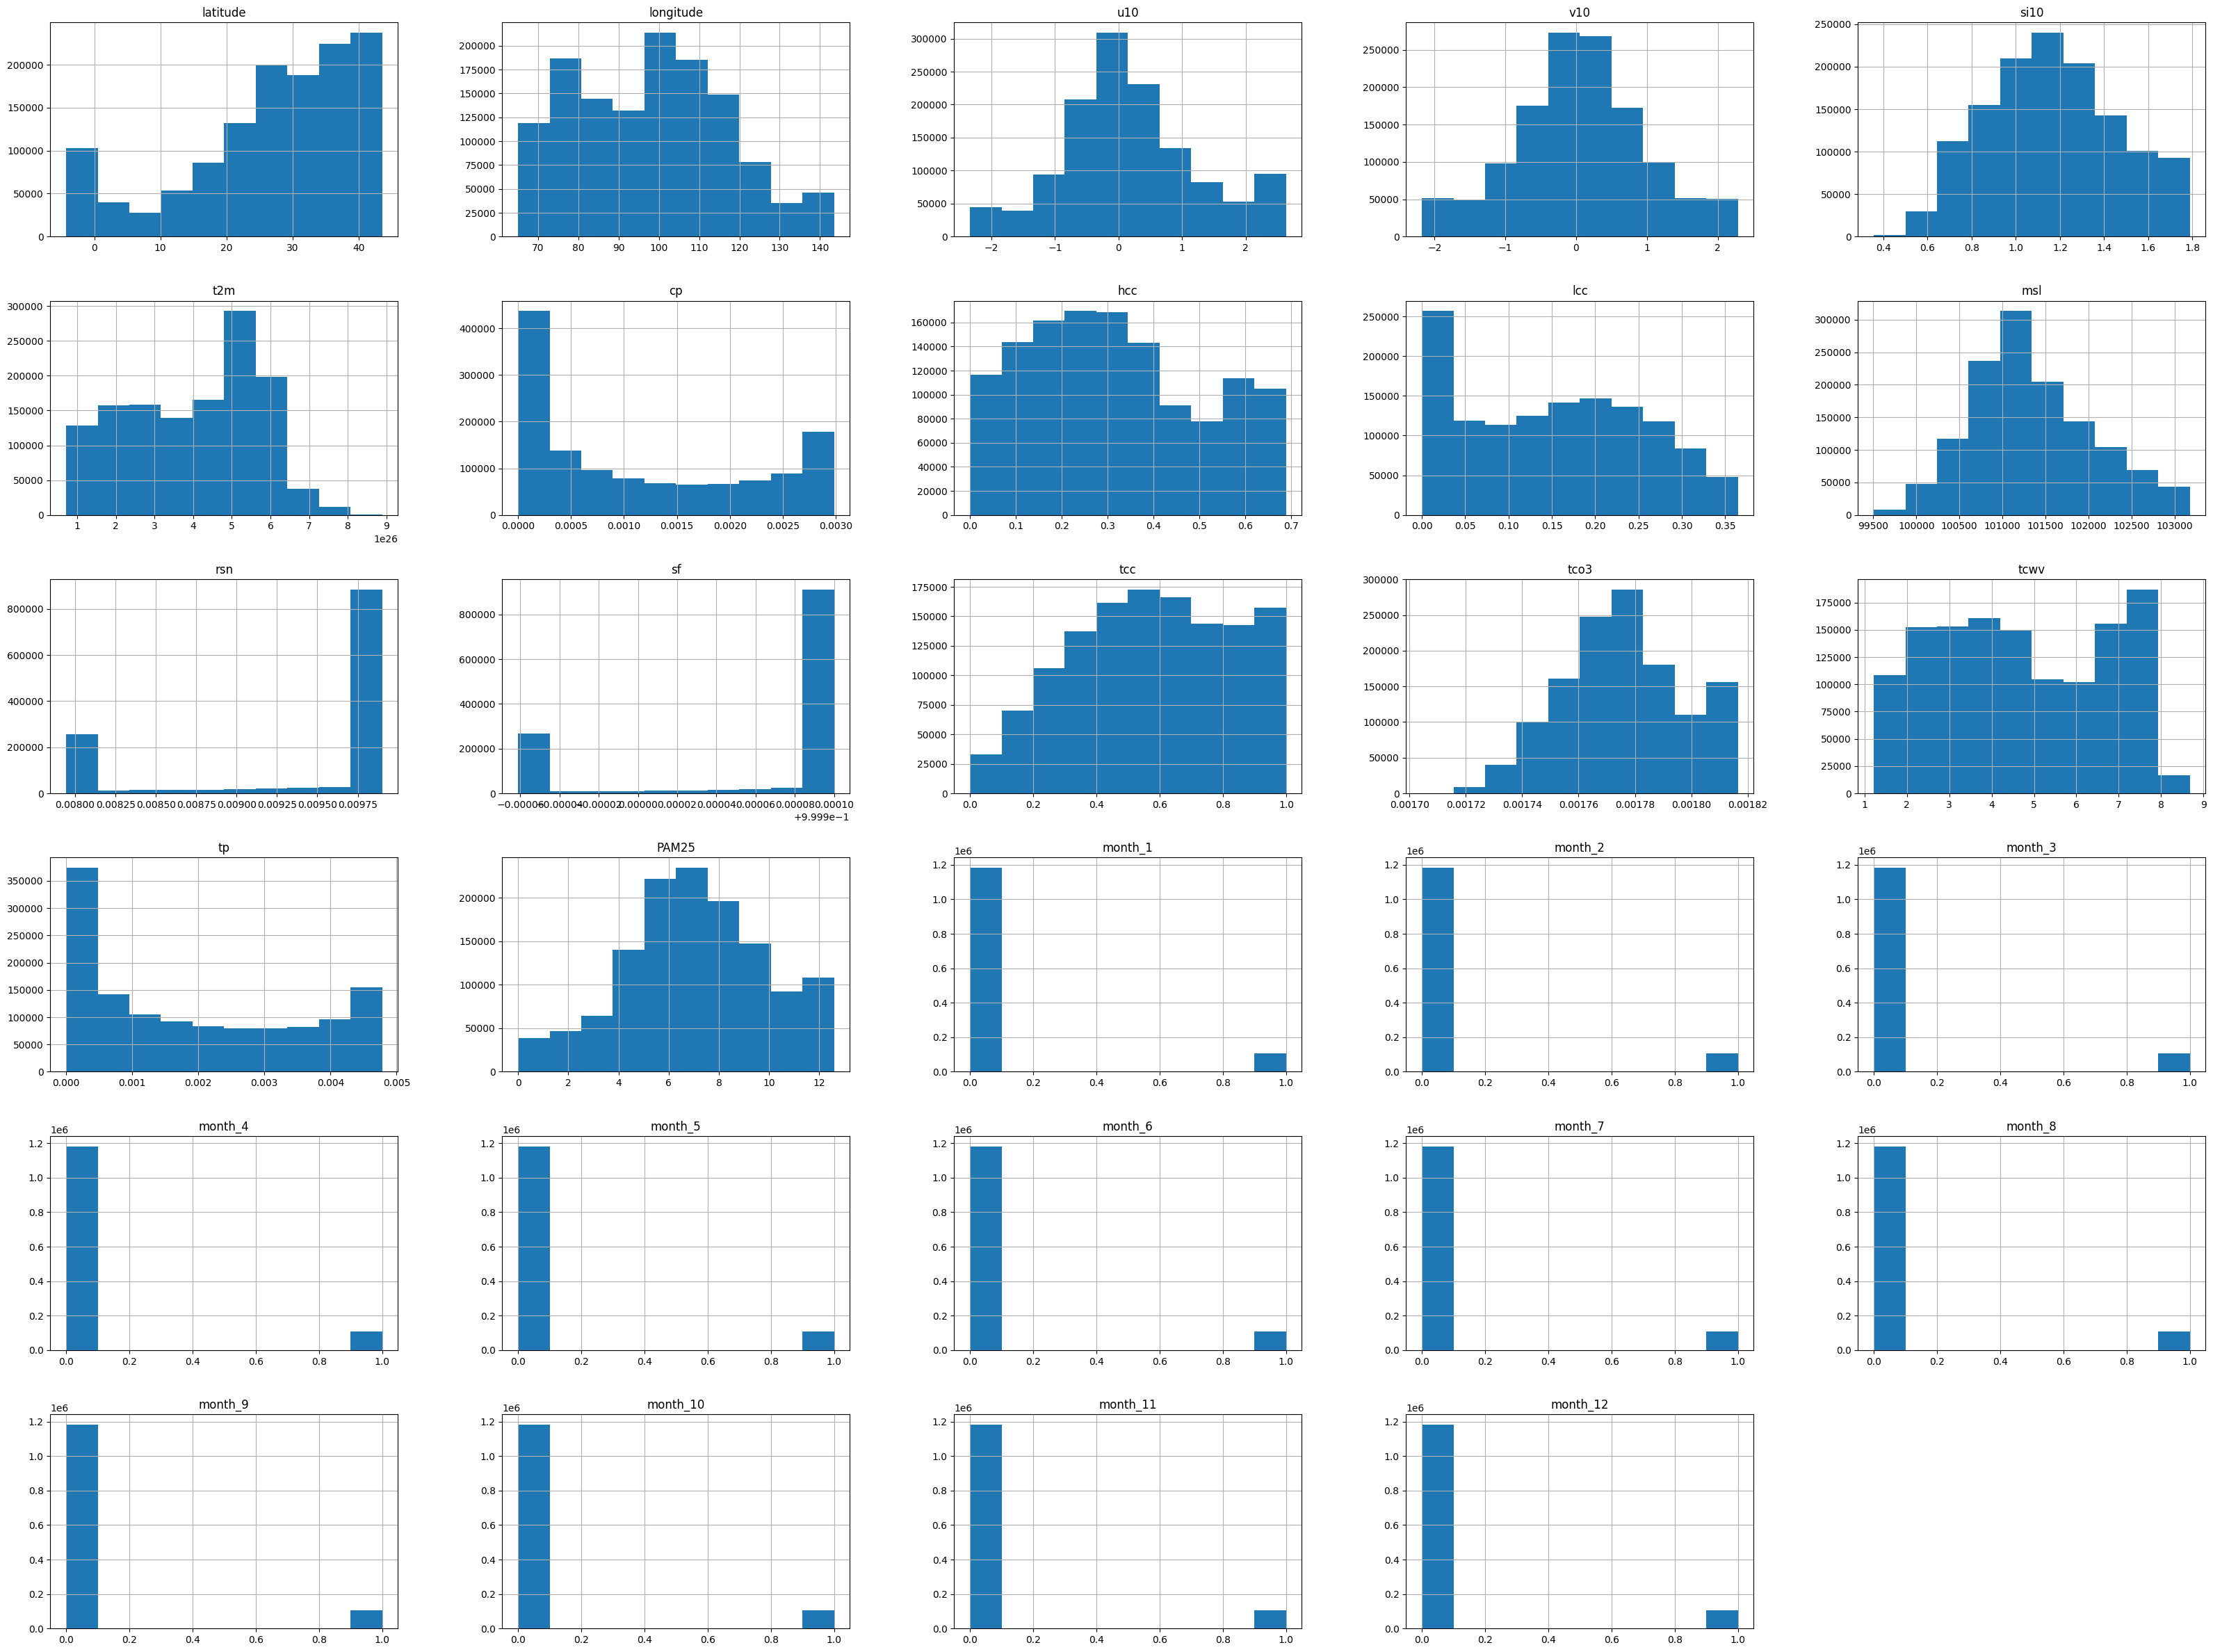

In [19]:
df.hist(figsize=(40,30))

In [21]:
import os
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from joblib import dump, load

# Assuming df is your preprocessed DataFrame with features and target variable
# Split the DataFrame into features (X) and target variable (y)
X = df.drop(columns=['PAM25'])  # Features
y = df['PAM25']  # Target variable

df_test.dropna()
x_test = df_test.drop(columns=['PAM25'])
y_test = df_test['PAM25']

# Check if the model is already saved
model_file = 'random_forest_model_15years_18_.joblib'
if os.path.exists(model_file):
    # Load the model
    model = load(model_file)
    print("Model loaded successfully.")
else:
    # Scale the features
    # scaler = StandardScaler()
    # X_scaled = scaler.fit_transform(X)

    # Split the data into training and testing sets
    # X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

    # Train a Random Forest model
    model = RandomForestRegressor(n_estimators=100, random_state=42)
    model.fit(X, y)

    # Save the model
    dump(model, model_file)
    print("Model trained and saved successfully.")

# Predict on the testing set
y_pred = model.predict(x_test)
y_pred = y_pred
print(y_pred)
print(y_test)
# Evaluate the model's performance
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

score = r2_score(y_test, y_pred) * 100
print(score)



MemoryError: could not allocate 97046848 bytes